## Train SVM as the classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

SVC(gamma=1)

## Heatmap

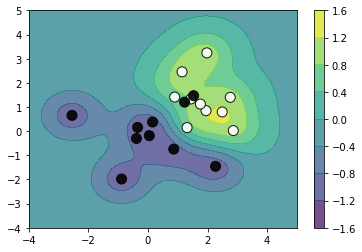

In [8]:
N = 100
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
# fig, axis = plt.plot()
C = plt.contourf(xx, yy, clf_no_weights.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), alpha=.75)
cb = plt.colorbar(C)
plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight_constant,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

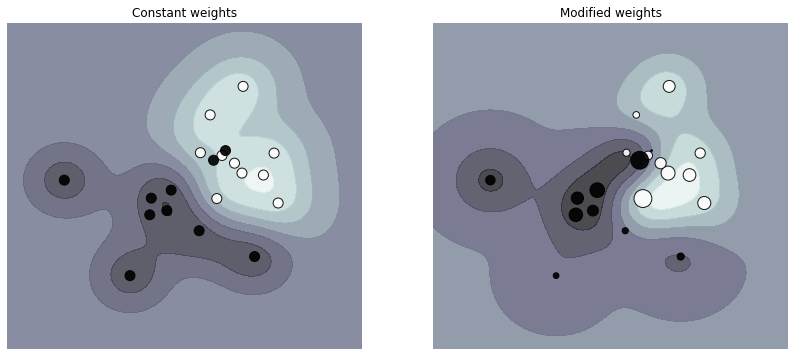

In [1]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html#sphx-glr-download-auto-examples-svm-plot-weighted-samples-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)

# two figures
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

## Gif

In [ ]:
import imageio

gif_path = f'./results/g.gif'
files = []
with imageio.get_writer(gif_path, duration = 0.5, mode='I') as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)

### Draw multiple subfigures

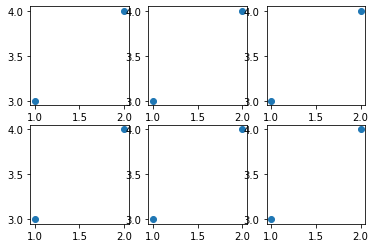

In [5]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

X = np.array([1.,2.])
Y = np.array([3.,4.])

i = 1

for _ in range(2):
    for _ in range(3):
        ax = plt.subplot(2, 3, i)
        ax.scatter(X, Y)
        i+=1